In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ion_sim import IonSim, plot, init
from pint import UnitRegistry
from math import pi as π

u = UnitRegistry()
u.setup_matplotlib()

In [2]:
wx = np.array([1,2])
wy = np.array([10,10])
wz = np.array([10,10])
D = 10*u('1 um')


#def Trap_Frequencies(ωx,ωy,ωz,d):
m = u('40 amu') 
ωx = wx * 2*π * u('MHz')
ωy = wy * 2*π * u('MHz')
ωz = wz * 2*π * u('MHz')


  

class Trap_Variation(IonSim):
    def U(self, x, y, z, t):

        m = self.m
        d_0 = D.to_base_units().m
        
        #creates functions for the invidiual traps with distance d from each other
        def get_lambda_func(i):
            return lambda x: (1/2) * m * (ωx[i])**2 * (x-i*d_0)**2
        func = [get_lambda_func(i) for i in range(np.size(ωx))]
        func.append(10000)
        func.append(10000)
        s = [(x >= -d_0/2 + i*d_0) & (x < d_0/2 + i*d_0) for i in range(np.size(ωx))]
        s.append(x < -d_0/2)
        s.append(x >= d_0/2 + np.size(ωx)*d_0)
        Ux = np.piecewise(x,s,func)
        
#         Ux = np.piecewise(x,[(x < 0), (x >= 0)],[lambda x: (1/2) * m * ωx[0]**2 * x**2,
#                                                   lambda x: (1/2) * m *ωx[1]**2 * x**2])
        
        #Ux = ((1/2) * m * (ωx)**2 * x**2)
        Uy = ((1/2) * m * (ωy)**2 * y**2).to_base_units().m
        Uz = ((1/2) * m * (ωz)**2 * z**2).to_base_units().m

        return (Ux + Uy + Uz)
          
Trap = Trap_Variation(u) #Initialization of the class
Trap.m = m * np.ones(np.size(ωx))
Trap.x0 = init.string_2(Trap,dx = D)  #Initialization of the ion positon 
ν, e = Trap.normal_modes()
μ = np.around(((2*π*ν/ωx[0])**2).to('dimensionless'),4)


for i in range(np.size(ωx)):
    print(f'{"N="+str(np.size(ωx)) if i==0 else "":<6}{np.around(μ[i],3):=6}      {np.around(e[0,:,i],4)}')
print('\n')

#Trap_Frequencies(ωx,ωy,ωz,d)

C:\Users\javie\anaconda3\lib\site-packages\numpy\lib\function_base.py:614: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  y[condlist[k]] = item(vals, *args, **kw)


ValueError: NumPy boolean array indexing assignment cannot assign 2 input values to the 1 output values where the mask is true

In [17]:
del x

TypeError: Can't differentiate w.r.t. type <class 'int'>

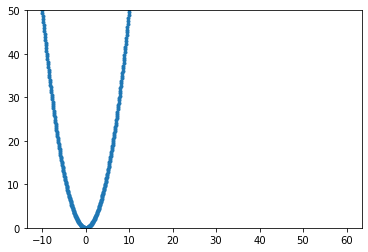

In [5]:
import autograd.numpy as np  
from autograd.test_util import check_grads
from autograd import grad  
from autograd import elementwise_grad as egrad

d = 10
m = 1
x = np.linspace(-d,6*d,1000)
ωx = np.array([1,2,4,2])


def U(x):
    def get_lambda_func(i):
        return lambda x: (1/2) * m * (ωx[i])**2 * (x-i*d)**2
    func = [get_lambda_func(i) for i in range(np.size(ωx))]
    func.append(10000)
    func.append(10000)
    s = [(x >= -d/2 + i*d) & (x <= d/2 + i*d) for i in range(np.size(ωx))]
    s.append(x <= -d/2)
    s.append(x >= d/2 + (np.size(ωx)-1)*d)
    Ux = np.piecewise(x,s,func)
    
    return Ux

def U2(x):
    
    Ux = (1/2) * m * (ωx[0])**2 * x**2
    
    return Ux


plt.plot(x,U2(x),'.')
plt.ylim([0, 50])   



gradU = egrad(U) 
gradU(0)
#plt.plot(x,gradU(x))